# Mallona et al. NAR 2020

Data from: https://doi.org/10.1093/nar/gkaa1168

### initialize definitions

In [1]:
suppressMessages(suppressWarnings(source(here::here("code/init.R"))))

In [2]:
md_baubec <- tibble::tribble(
    ~name, ~track,
    "active_3a", "Mallona_NAR_2020.HA36_TKO_DNMT3A2_r2",
    "active_3b", "Mallona_NAR_2020.HA36_TKO_DNMT3B1_r2"
)
md_baubec

name,track
<chr>,<chr>
active_3a,Mallona_NAR_2020.HA36_TKO_DNMT3A2_r2
active_3b,Mallona_NAR_2020.HA36_TKO_DNMT3B1_r2


In [3]:
baubec_meth_all <- misha.ext::gextract_meth(tracks = md_baubec$track, names =  md_baubec$name, extract_meth_calls = TRUE) %cache_df% here("output/baubec_meth_all.tsv") %>% as_tibble()

In [4]:
baubec_meth_plus <- misha.ext::gextract_meth(tracks = paste0(md_baubec$track, "_plus"), names =  md_baubec$name, extract_meth_calls = TRUE) %cache_df% here("output/baubec_meth_plus.tsv") %>% as_tibble()
baubec_meth_minus <- misha.ext::gextract_meth(tracks = paste0(md_baubec$track, "_minus"), names =  md_baubec$name, extract_meth_calls = TRUE) %cache_df% here("output/baubec_meth_minus.tsv") %>% as_tibble()

In [5]:
baubec_meth_all %>% filter(active_3a.cov > 0 | active_3b.cov > 0) %>% nrow()
baubec_meth_plus %>% filter(active_3a.cov > 0 | active_3b.cov > 0) %>% nrow()
baubec_meth_minus %>% filter(active_3a.cov > 0 | active_3b.cov > 0) %>% nrow()

[1] 16082106

[1] 12036497

[1] 12028654

In [6]:
summary(baubec_meth_all$active_3a.cov[baubec_meth_all$active_3a.cov > 0])
scales::comma(sum(baubec_meth_all$active_3a.cov > 0))

summary(baubec_meth_plus$active_3a.cov[baubec_meth_plus$active_3a.cov > 0])
scales::comma(sum(baubec_meth_plus$active_3a.cov > 0))

summary(baubec_meth_minus$active_3a.cov[baubec_meth_minus$active_3a.cov > 0])
scales::comma(sum(baubec_meth_minus$active_3a.cov > 0))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   10.0    11.0    14.0    16.5    18.0  1972.0 

[1] "2,298,609"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   11.00   14.00   16.36   18.00 1947.00 

[1] "1,151,583"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   11.00   14.00   16.58   18.00 1904.00 

[1] "1,152,232"

In [7]:
summary(baubec_meth_all$active_3b.cov[baubec_meth_all$active_3b.cov > 0])
scales::comma(sum(baubec_meth_all$active_3b.cov > 0))

summary(baubec_meth_plus$active_3b.cov[baubec_meth_plus$active_3b.cov > 0])
scales::comma(sum(baubec_meth_plus$active_3b.cov > 0))

summary(baubec_meth_minus$active_3b.cov[baubec_meth_minus$active_3b.cov > 0])
scales::comma(sum(baubec_meth_minus$active_3b.cov > 0))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   4.291   6.000 190.000 

[1] "15,928,534"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.861   4.000  99.000 

[1] "11,944,096"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.864   4.000 101.000 

[1] "11,936,048"

In [8]:
baubec_meth_cov <- baubec_meth_all %>% filter(active_3a.cov >= 10, active_3b.cov >= 10) 
nrow(baubec_meth_cov)

[1] 306664

In [9]:
baubec_meth_plus_cov <- baubec_meth_plus %>% filter(active_3a.cov >= 10, active_3b.cov >= 10) 
nrow(baubec_meth_plus_cov)

[1] 93967

In [10]:
baubec_meth_minus_cov <- baubec_meth_minus %>% filter(active_3a.cov >= 10, active_3b.cov >= 10) 
nrow(baubec_meth_minus_cov)

[1] 95747

In [11]:
esc_wgbs <- misha.ext::gextract_meth("schuebler.wgbs.esc.sum", intervals=gintervals.all(), names="esc") %>% 
    filter(esc.cov >= 7) %>% 
    select(-intervalID) %cache_df% 
    here("data/schuebler_esc_wgbs.tsv") %>% 
    as_tibble()

In [12]:
filter_low_esc_meth <- function(df, esc_wgbs){
    df %>% inner_join(esc_wgbs %>% select(chrom, start, end, esc) %>% filter(esc >= 0.05))
}

## Model ES

In [13]:
m_bau_plus <- baubec_meth_plus_cov %>% 
    filter_low_esc_meth(esc_wgbs)
m_bau_minus <- baubec_meth_minus_cov %>% 
    filter_low_esc_meth(esc_wgbs) 

scales::comma(nrow(m_bau_plus))
scales::comma(nrow(m_bau_minus))

Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")


[1] "48,354"

[1] "49,215"

In [14]:
intervs_all_plus <- m_bau_plus %>% select(chrom, start, end)
intervs_all_minus <- m_bau_minus %>% select(chrom, start, end)

In [15]:
seq_df_plus <- get_seq_df(intervs_all_plus, flank_bp = 5)
seq_df_minus <- get_seq_df(intervs_all_minus, strand = -1, flank_bp = 5)

In [16]:
seq_df_wide_plus <- seq_df_to_wide(seq_df_plus, flank_bp = 5)
seq_df_wide_minus <- seq_df_to_wide(seq_df_minus, flank_bp = 5)

In [17]:
head(m_bau_plus)

chrom,start,end,active_3a,active_3b,active_3a.cov,active_3b.cov,active_3a.meth,active_3b.meth,intervalID,esc
<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
chr1,3322345,3322346,0.0000000,0.0,13,10,0,0,1,0.5714286
chr1,3574384,3574385,0.1764706,0.1,17,10,3,1,1,0.9000000
chr1,3574389,3574390,0.2352941,0.1,17,10,4,1,1,0.8333333
chr1,3574421,3574422,0.1904762,0.0,21,10,4,0,1,0.9285714
chr1,3698778,3698779,0.0000000,0.0,15,11,0,0,1,1.0000000
chr1,3708906,3708907,0.0000000,0.0,29,11,0,0,1,0.8333333


In [18]:
model_ab_bau_plus_A <- gen_seq_model(seq_df_wide_plus, m_bau_plus, active_3a) %cache_rds% here("output/baubec_plus_a_dinuc_model_5bp.rds")
model_ab_bau_plus_B <- gen_seq_model(seq_df_wide_plus, m_bau_plus, active_3b) %cache_rds% here("output/baubec_plus_b_dinuc_model_5bp.rds")

model_ab_bau_minus_A <- gen_seq_model(seq_df_wide_minus, m_bau_minus, active_3a) %cache_rds% here("output/baubec_plus_a_dinuc_model_5bp.rds")
model_ab_bau_minus_B <- gen_seq_model(seq_df_wide_minus, m_bau_minus, active_3b) %cache_rds% here("output/baubec_plus_b_dinuc_model_5bp.rds")

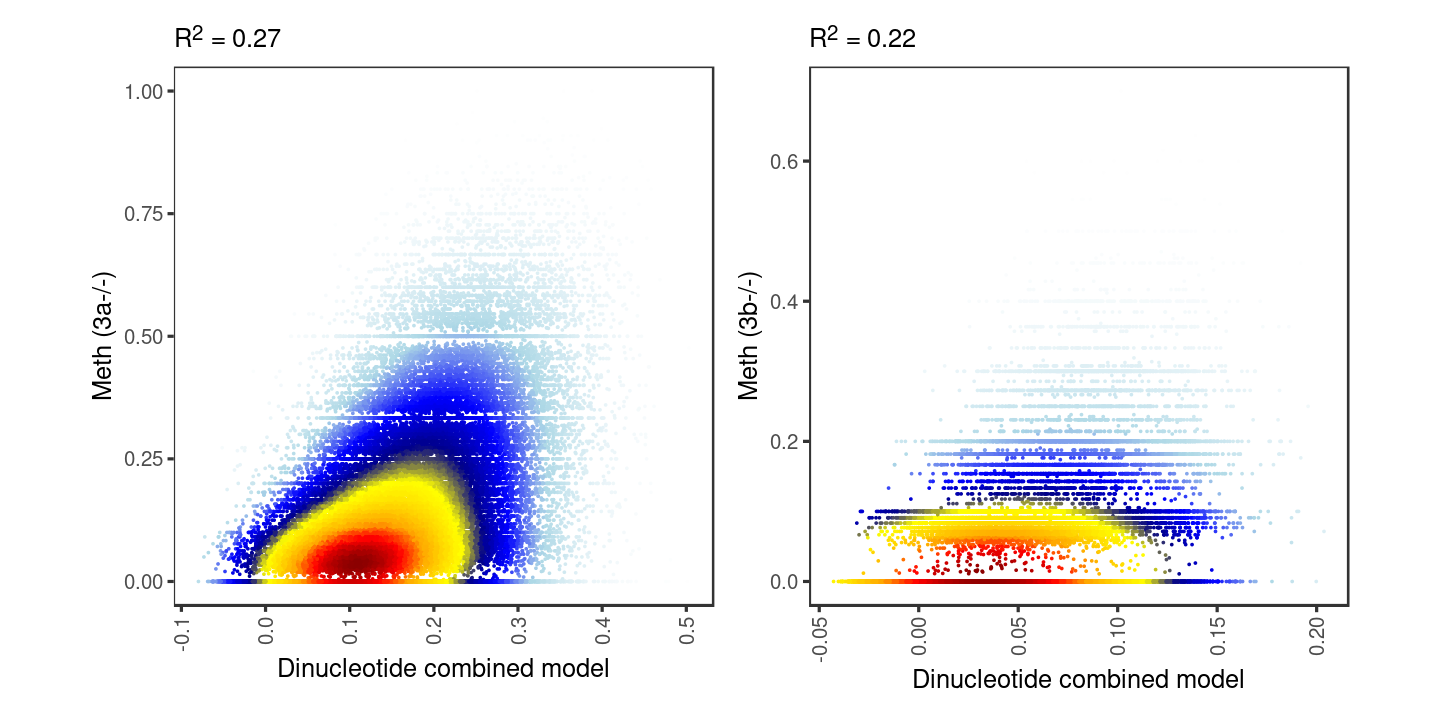

In [19]:
options(repr.plot.width = 12, repr.plot.height = 6)
bandwidth <- 0.08
point_size <- 0.001
p_a <- tibble(pred = model_ab_bau_plus_A$pred, y = model_ab_bau_plus_A$y) %>% 
    mutate(col = densCols(., bandwidth=0.06,colramp=colorRampPalette(c("white","lightblue", "blue", "darkblue", "yellow", "gold","orange","red", "darkred" )))) %>% 
    ggplot(aes(x=pred, y=y, col=col)) + 
        geom_point(shape=19, size=point_size) + 
        scale_color_identity() +         
        xlab("Dinucleotide combined model") + 
        ylab("Meth (3a-/-)") +         
        theme(aspect.ratio=1, panel.grid.major=element_blank(), panel.grid.minor=element_blank()) + 
        labs(subtitle = glue("R^2 = {cor}", cor = round(cor(model_ab_bau_plus_A$pred, model_ab_bau_plus_A$y)^2, digits=2))) + 
        theme(plot.subtitle = ggtext::element_markdown())

p_b <- tibble(pred = model_ab_bau_plus_B$pred, y = model_ab_bau_plus_B$y) %>% 
    mutate(col = densCols(., bandwidth=0.06,colramp=colorRampPalette(c("white","lightblue", "blue", "darkblue", "yellow", "gold","orange","red", "darkred" )))) %>% 
    ggplot(aes(x=pred, y=y, col=col)) + 
        geom_point(shape=19, size=point_size) + 
        scale_color_identity() + 
        xlab("Dinucleotide combined model") + 
        ylab("Meth (3b-/-)") +         
        theme(aspect.ratio=1, panel.grid.major=element_blank(), panel.grid.minor=element_blank()) + 
        labs(subtitle = glue("R^2 = {cor}", cor = round(cor(model_ab_bau_plus_B$pred, model_ab_bau_plus_B$y)^2, digits=2))) + 
        theme(plot.subtitle = ggtext::element_markdown())

p_a + p_b

In [20]:
coef_df_A <- get_coef_df(model_ab_bau_plus_A)
coef_df_B <- get_coef_df(model_ab_bau_plus_B)

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-4



### Figure 5B,C

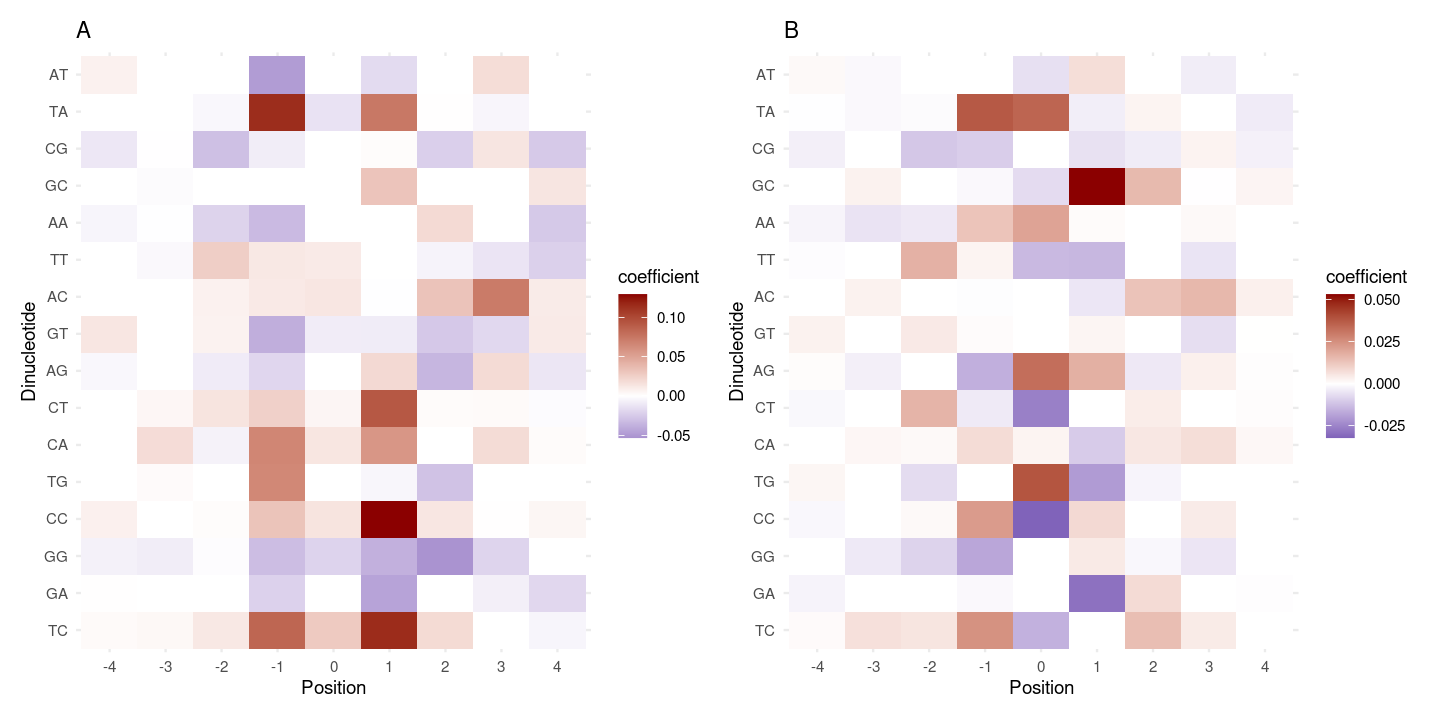

In [21]:
options(repr.plot.width = 12, repr.plot.height = 6)
p_a <- coef_df_A %>% 
    ggplot(aes(x=pos, y=dinuc, fill=coefficient)) + 
        geom_tile() + 
        scale_fill_gradient2(low = "darkblue", high = "darkred", mid = "white", midpoint = 0, na.value="white") + 
        theme_minimal() + 
        ylab("Dinucleotide") + 
        xlab("Position") + 
        ggtitle("A")
p_b <- coef_df_B %>% 
    ggplot(aes(x=pos, y=dinuc, fill=coefficient)) + 
        geom_tile() + 
        scale_fill_gradient2(low = "darkblue", high = "darkred", mid = "white", midpoint = 0, na.value="white") + 
        theme_minimal() + 
        ylab("Dinucleotide") + 
        xlab("Position") + 
        ggtitle("B")
p_a + p_b

In [22]:
model_ab <- readr::read_rds(here("output/ab_dinuc_model_5bp.rds"))
model_a <- readr::read_rds(here("output/a_dinuc_model_5bp.rds"))
model_b <- readr::read_rds(here("output/b_dinuc_model_5bp.rds"))

In [23]:
all_cpgs <- gintervals.load("intervs.global.seq_CG")

In [24]:
intercept_A <- coef(model_ab_bau_plus_A$fit_cv, s = "lambda.min")[1, ]
intercept_B <- coef(model_ab_bau_plus_B$fit_cv, s = "lambda.min")[1, ]

In [25]:
coef_mat_A <- coef_df_to_matrix(coef_df_A %>% select(pos, dinuc, coefficient), model_ab, intercept=intercept_A) %cache_rds% here("output/coef_A_mat.rds")
coef_mat_B <- coef_df_to_matrix(coef_df_B %>% select(pos, dinuc, coefficient), model_ab, intercept=intercept_B) %cache_rds% here("output/coef_B_mat.rds")

In [26]:
res <- compute_interval_model_mat_score_parallel(all_cpgs, model_ab, coef_mat_A, coef_mat_A, coef_mat_B) %cache_df% here("output/baubec_model_vs_ours_not_sym.tsv") %>% as_tibble()

### Figure 5D

In [27]:
a_limits <- c(-0.1,0.5)
a_bins <- seq(-0.1, 0.5, length.out = 30)
b_limits <- c(-0.05,0.2)
b_bins <- seq(-0.05, 0.2, length.out = 30)

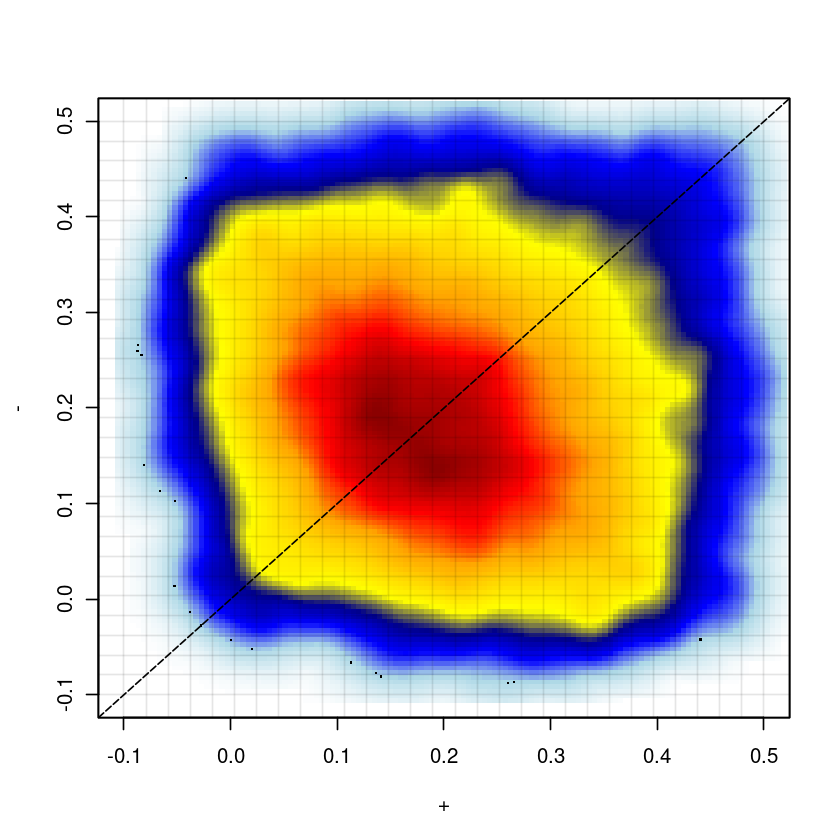

In [28]:
cols <- colorRampPalette(c("white","lightblue", "blue", "darkblue", "yellow", "gold","orange","red", "darkred"))
options(repr.plot.width = 7, repr.plot.height = 7)
smoothScatter(
    res$score_a_plus, 
    res$score_a_minus,     
    xlab="+", 
    ylab = "-",     
    xlim = a_limits, 
    ylim = a_limits, 
    colramp = cols)
abline(v = a_bins, h = a_bins, col=alpha(rgb(0,0,0), 0.1))
abline(a = 0, b = 1, lty=5)

### Figure 5E

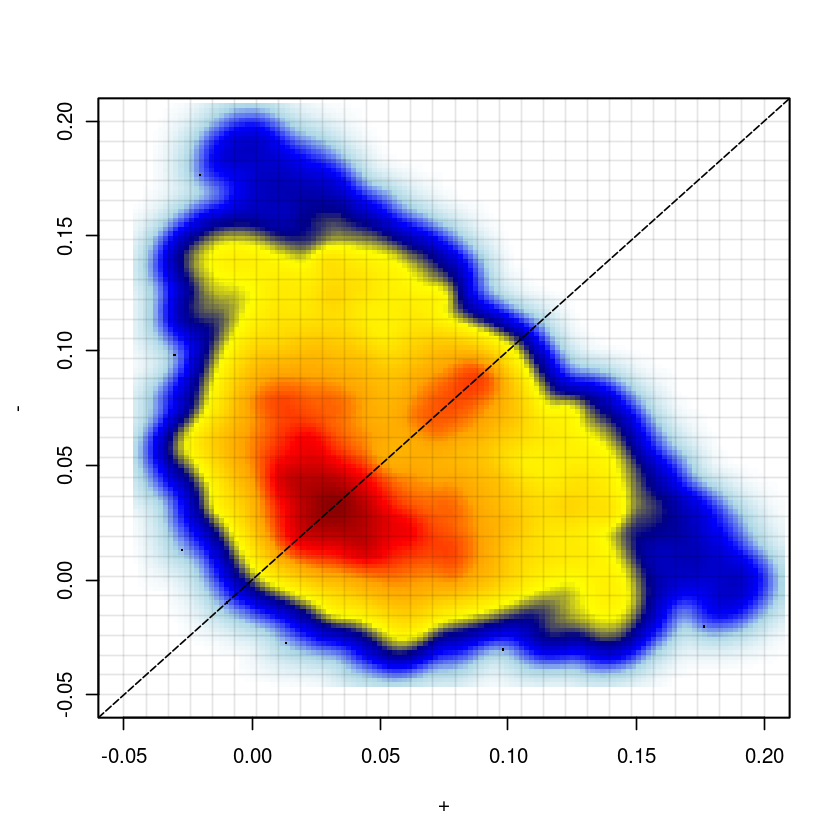

In [29]:
options(repr.plot.width = 7, repr.plot.height = 7)
smoothScatter(
    res$score_b_plus, 
    res$score_b_minus,     
    xlab="+", 
    ylab = "-",     
    xlim = b_limits, 
    ylim = b_limits,
    colramp = cols)
abline(v = b_bins, h = b_bins, col=alpha(rgb(0,0,0), 0.1))
abline(a = 0, b = 1, lty=5)

In [30]:
df <- {
    df_wt <- tracks_key  %>% filter(day == "d5") %>% filter(line == "wt")
    df_ko3a <- tracks_key  %>% filter(day == "d5") %>% filter(line == "ko3a")
    df_ko3b <- tracks_key  %>% filter(day == "d5") %>% filter(line == "ko3b")
    df_ab_bulk <- extract_meth_annot(c(
        df_wt$track_name, 
        df_ko3a$track_name, 
        df_ko3b$track_name), 
        names = c(df_wt$name, df_ko3a$name, df_ko3b$name), d_expand = 250, extract_meth_calls = TRUE)
    df <- df_ab_bulk %>% select(chrom, start, end, d_exon:gc_cont)
    df$wt.meth <- rowSums(df_ab_bulk[, paste0(df_wt$name, ".meth")], na.rm=TRUE)
    df$wt.cov <- rowSums(df_ab_bulk[, paste0(df_wt$name, ".cov")], na.rm=TRUE)

    df$ko3a.meth <- rowSums(df_ab_bulk[, paste0(df_ko3a$name, ".meth")], na.rm=TRUE)
    df$ko3a.cov <- rowSums(df_ab_bulk[, paste0(df_ko3a$name, ".cov")], na.rm=TRUE)

    df$ko3b.meth <- rowSums(df_ab_bulk[, paste0(df_ko3b$name, ".meth")], na.rm=TRUE)
    df$ko3b.cov <- rowSums(df_ab_bulk[, paste0(df_ko3b$name, ".cov")], na.rm=TRUE)

    df$ko3a <- df$ko3a.meth / df$ko3a.cov
    df$wt <- df$wt.meth / df$wt.cov
    df$ko3b <- df$ko3b.meth / df$ko3b.cov
    df    
} %cache_df% here("output/ab_diff_d5_bulk.tsv") %>% as_tibble()

We take only regions that are well covered and add a `diff` column with `3a(-/-) - 3b(-/-)`

In [31]:
min_cov <- 50
df_diff <- {
        df_diff <- df %>% filter(ko3a.cov >= min_cov, ko3b.cov >= min_cov, wt.cov >= min_cov) %>% mutate(diff = ko3a - ko3b)
        df_diff <- df_diff %>% gintervals.neighbors1("intervs.global.tss") %>% select(chrom:diff, geneSymbol, dist)
        df_diff
} %cache_df%  here("output/ab_diff_d5_bulk_diff.tsv") %>% as_tibble()

In [32]:
head(df_diff)

chrom,start,end,d_exon,d_tss,tor,ab_score,a_score,b_score,cg_cont,⋯,ko3a.meth,ko3a.cov,ko3b.meth,ko3b.cov,ko3a,wt,ko3b,diff,geneSymbol,dist
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
chr1,3137716,3137717,58268,67996,-0.807965,-0.06375566,-0.0563031,-0.07885952,0.03636364,⋯,88,95,50,58,0.9263158,0.9333333,0.8620690,0.06424682,mKIAA1889,67995
chr1,3137749,3137750,58235,67963,-0.807965,0.35113215,0.1569280,-0.24173479,0.03636364,⋯,92,100,54,62,0.9200000,0.9375000,0.8709677,0.04903226,mKIAA1889,67962
chr1,3137829,3137830,58155,67883,-0.807965,-0.84893745,-0.5477075,0.04839351,0.03272727,⋯,97,105,55,61,0.9238095,0.9300000,0.9016393,0.02217018,mKIAA1889,67882
chr1,3137834,3137835,58150,67878,-0.807965,-0.15073226,-0.1115560,-0.05077374,0.03272727,⋯,97,105,55,61,0.9238095,0.9300000,0.9016393,0.02217018,mKIAA1889,67877
chr1,3137836,3137837,58148,67876,-0.807965,-0.32485920,-0.2463233,0.07614822,0.03272727,⋯,97,105,55,61,0.9238095,0.9300000,0.9016393,0.02217018,mKIAA1889,67875
chr1,3137840,3137841,58144,67872,-0.807965,-0.10740878,0.0732030,-0.11832523,0.03272727,⋯,97,105,55,61,0.9238095,0.9300000,0.9016393,0.02217018,mKIAA1889,67871


In [33]:
meth_df_meeb <- df_diff %>% left_join(res)

Joining, by = c("chrom", "start", "end")


In [34]:
meth_df_meeb <- meth_df_meeb %>% rename(mA = ko3a, mB = ko3b)

In [35]:
meth_df_meeb_f <- meth_df_meeb %>% 
    filter(abs(d_tss) >= 2000) %>% 
    filter_low_esc_meth(esc_wgbs) %>% 
    gintervals.neighbors1(get_all_enhancers()) %>% 
    filter(dist != 0) %>% 
    select(-(chrom1:end1))
dim(meth_df_meeb_f)

Joining, by = c("chrom", "start", "end")


[1] 947724     35

In [36]:
meth_df_meeb_f %>% colnames()

[1] "chrom"             "start"             "end"              
 [4] "d_exon"            "d_tss"             "tor"              
 [7] "ab_score"          "a_score"           "b_score"          
[10] "cg_cont"           "gc_cont"           "wt.meth"          
[13] "wt.cov"            "ko3a.meth"         "ko3a.cov"         
[16] "ko3b.meth"         "ko3b.cov"          "mA"               
[19] "wt"                "mB"                "diff"             
[22] "geneSymbol"        "dist"              "score_plus"       
[25] "score_minus"       "score_a_plus"      "score_a_minus"    
[28] "score_b_plus"      "score_b_minus"     "score_model_plus" 
[31] "score_model_minus" "score_orig_plus"   "score_orig_minus" 
[34] "esc"               "dist1"

### Figure 5F,G

In [37]:
meth_df_meeb_d4 <- calc_eb_day0_to_day4_cpg_meth(min_cov = 10, max_na  = 5) %>% 
    rename(mA = d4_3a, mB = d4_3b) %>% 
    inner_join(fread(here("output/ebd_day1_to_day4_cpg_meth_mat.tsv")) %>% select(chrom, start, end)) %>% 
    left_join(res)

Joining, by = c("chrom", "start", "end")
Joining, by = c("chrom", "start", "end")


In [38]:
df_A <- meth_df_meeb_d4 %>%
        mutate(score_plus = cut(score_a_plus, a_bins)) %>%
        mutate(score_minus = cut(score_a_minus, a_bins)) %>%
        group_by(score_plus, score_minus) %>%
        summarise(mB = mean(mB, na.rm=TRUE)) %>%         
        filter(!is.na(score_plus), !is.na(score_minus)) %>% 
        tidyr::complete(fill=list(mB = NA))  %>% 
    arrange(score_plus) %>%
    group_by(score_minus) %>%
    mutate(mB = zoo::rollapply(mB, FUN = function(x) mean(x, na.rm=TRUE), width=4, fill=NA)) %>%
    arrange(score_minus) %>%
    group_by(score_plus) %>%    
    mutate(mB = zoo::rollapply(mB, FUN = function(x) mean(x, na.rm=TRUE), width=4, fill=NA)) %>%
    na.omit()                       

In [39]:
df_B <- meth_df_meeb_d4 %>%
        mutate(score_plus = cut(score_b_plus, b_bins)) %>%
        mutate(score_minus = cut(score_b_minus, b_bins)) %>%
        group_by(score_plus, score_minus) %>%
        summarise(mA = mean(mA, na.rm=TRUE)) %>%         
        filter(!is.na(score_plus), !is.na(score_minus)) %>% 
        tidyr::complete(fill=list(mA = NA)) %>% 
    arrange(score_plus) %>%
    group_by(score_minus) %>%
    mutate(mA = zoo::rollapply(mA, FUN = function(x) mean(x, na.rm=TRUE), width=4, fill=NA)) %>%
    arrange(score_minus) %>%
    group_by(score_plus) %>%    
    mutate(mA = zoo::rollapply(mA, FUN = function(x) mean(x, na.rm=TRUE), width=4, fill=NA)) %>%
    na.omit()

In [40]:
limits <- c(min(df_A$mB, df_B$mA), max(df_A$mB, df_B$mA))
limits

[1] 0.4130196 0.9259376

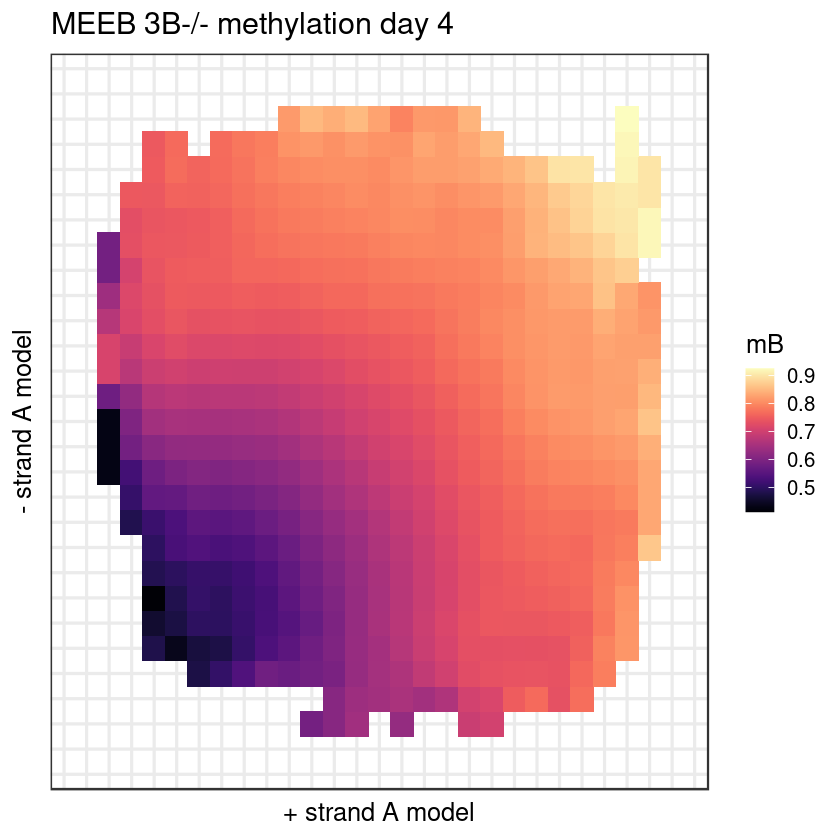

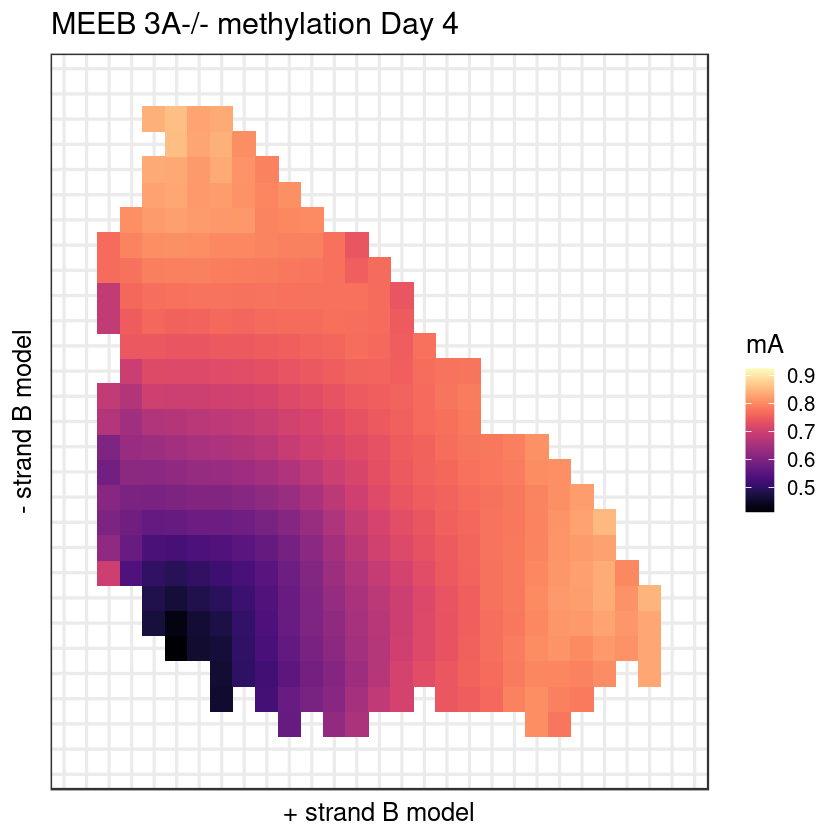

In [41]:
options(repr.plot.width = 7, repr.plot.height = 7)
colors <- viridis::viridis(30, option = "A")

p_A <- df_A %>% 
    ggplot(aes(x=score_plus, y=score_minus, fill=mB)) + 
            geom_tile() + 
            scale_fill_gradientn(colors=colors, limits=limits) + 
            vertical_labs() + 
            scale_x_discrete(drop=FALSE) + 
            scale_y_discrete(drop=FALSE) + 
            xlab("+ strand A model") + 
            ylab("- strand A model") + 
            ggtitle("MEEB 3B-/- methylation day 4") + 
            theme(axis.ticks.x = element_blank(),
                  axis.text.x = element_blank(),
                  axis.ticks.y = element_blank(),
                  axis.text.y = element_blank())
p_B <- df_B %>% 
    ggplot(aes(x=score_plus, y=score_minus, fill=mA)) + 
            geom_tile() + 
            scale_fill_gradientn(colors=colors, limits=limits) + 
            vertical_labs() + 
            scale_x_discrete(drop=FALSE) + 
            scale_y_discrete(drop=FALSE) + 
            xlab("+ strand B model") + 
            ylab("- strand B model") + 
            ggtitle("MEEB 3A-/- methylation Day 4") + 
            theme(axis.ticks.x = element_blank(),
                  axis.text.x = element_blank(),
                  axis.ticks.y = element_blank(),
                  axis.text.y = element_blank())

p_A 
p_B

#### Predict MEEB using strands

In [42]:
meth_df_meeb <- fread(here("output/ebd_day1_to_day4_cpg_meth_mat.tsv")) %>% left_join(res)

Joining, by = c("chrom", "start", "end")


In [43]:
feats_mat_comb_df <- meth_df_meeb %>% 
    inner_join(meth_df_meeb_d4 %>% select(chrom, start, end)) %>% 
    mutate(score_max_a = pmax(score_a_plus, score_a_minus)) %>% 
    mutate(score_max_b = pmax(score_b_plus, score_b_minus)) %>% 
    select(chrom, start, end, score_a_plus, score_a_minus, score_b_plus, score_b_minus, score_max_a, score_max_b, dAB) %>% 
    filter(!is.na(dAB))

feats_mat_comb <- feats_mat_comb_df %>% 
    select(-(chrom:end)) %>% 
    as.matrix()

feats_mat_comb %>% dim

Joining, by = c("chrom", "start", "end")


[1] 80228     7

In [44]:
library(xgboost)
dtrain <- xgb.DMatrix(feats_mat_comb[, -7], label=feats_mat_comb[, 7])

xgb_params <- readr::read_rds(here("data/xgb_params.rds"))

xgbcv <- xgb.cv(params = xgb_params$params, data = dtrain, nrounds = xgb_params$nrounds, nfold = 10, prediction = TRUE)

xgbtrain <- xgb.train(params = xgb_params$params, data = dtrain, nrounds = xgb_params$nrounds)

feats_mat_comb_df <- feats_mat_comb_df %>% 
    mutate(pred = xgbcv$pred)



Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




[1]	train-rmse:0.914976+0.001127	test-rmse:0.914986+0.003794 
[2]	train-rmse:0.881840+0.001363	test-rmse:0.881918+0.003766 
[3]	train-rmse:0.851517+0.002020	test-rmse:0.851576+0.003881 
[4]	train-rmse:0.823455+0.002133	test-rmse:0.823559+0.003889 
[5]	train-rmse:0.796019+0.002401	test-rmse:0.796166+0.004076 
[6]	train-rmse:0.770361+0.002147	test-rmse:0.770520+0.003819 
[7]	train-rmse:0.746327+0.002155	test-rmse:0.746500+0.003163 
[8]	train-rmse:0.724070+0.002124	test-rmse:0.724263+0.003047 
[9]	train-rmse:0.702849+0.002098	test-rmse:0.703063+0.003522 
[10]	train-rmse:0.683496+0.002147	test-rmse:0.683757+0.003792 
[11]	train-rmse:0.665380+0.002060	test-rmse:0.665712+0.003957 
[12]	train-rmse:0.648379+0.002221	test-rmse:0.648755+0.003472 
[13]	train-rmse:0.632596+0.002191	test-rmse:0.633018+0.003580 
[14]	train-rmse:0.617532+0.001933	test-rmse:0.618003+0.003785 
[15]	train-rmse:0.603758+0.002239	test-rmse:0.604296+0.003706 
[16]	train-rmse:0.590898+0.002381	test-rmse:0.591473+0.004014 
[

Predict all CpGs: 

In [45]:
d_all <- xgb.DMatrix(res %>% 
    mutate(score_max_a = pmax(score_a_plus, score_a_minus)) %>% 
    mutate(score_max_b = pmax(score_b_plus, score_b_minus)) %>%     
    select(score_a_plus, score_a_minus, score_b_plus, score_b_minus, score_max_a, score_max_b) %>% 
    as.matrix())
res <- res %>%
        mutate(comb_score = predict(xgbtrain, d_all))        

In [46]:
shap_contrib <- predict(xgbtrain, dtrain, predcontrib=TRUE, approxcontrib=TRUE) 
shap_contrib %>% head()

score_a_plus,score_a_minus,score_b_plus,score_b_minus,score_max_a,score_max_b,BIAS
0.03257944,0.00662072,0.13034897,-0.08361857,0.07228424,0.2976556,-0.2581046
0.03127447,-0.07440750,-0.05122968,-0.06406826,-0.08237033,-0.3153226,-0.2581046
-0.17793657,0.04980103,-0.08292633,0.03964013,-0.11479261,0.0373612,-0.2581046
-0.04900409,0.02451609,-0.07236253,-0.02743806,-0.01833785,-0.2095805,-0.2581046
-0.14197846,0.01013156,-0.02193703,-0.04253504,-0.18508732,-0.1496402,-0.2581046
0.07941829,-0.02812006,-0.04589148,0.15377595,-0.04417774,0.2954025,-0.2581046


In [47]:
colMeans(abs(shap_contrib)) 

score_a_plus score_a_minus  score_b_plus score_b_minus   score_max_a 
   0.05898015    0.05601591    0.06136920    0.07151962    0.10136252 
  score_max_b          BIAS 
   0.16868949    0.25810462

### Figure 5H

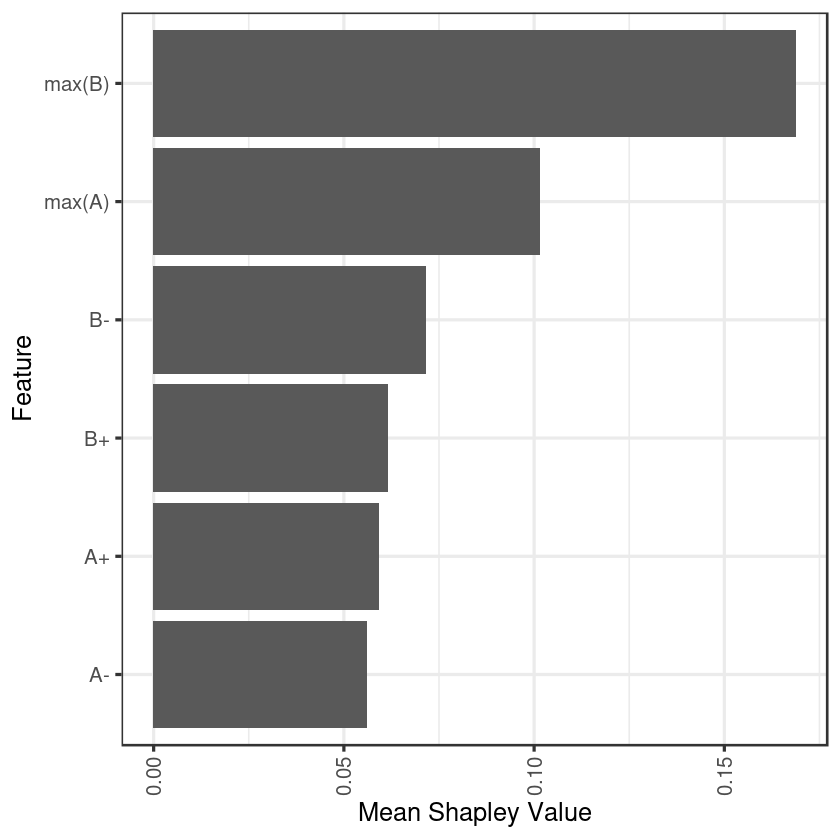

In [48]:
p_shap <- colMeans(abs(shap_contrib)) %>% 
    set_names(c("A+", "A-", "B+", "B-", "max(A)", "max(B)", "BIAS")) %>% 
    enframe() %>% 
    arrange(value) %>%
    filter(name != "BIAS") %>%      
    ggplot(aes(x=reorder(name, value), y=value)) + geom_col() + coord_flip() + ylab("Mean Shapley Value") + xlab("Feature")

p_shap

[1] 0.4487908

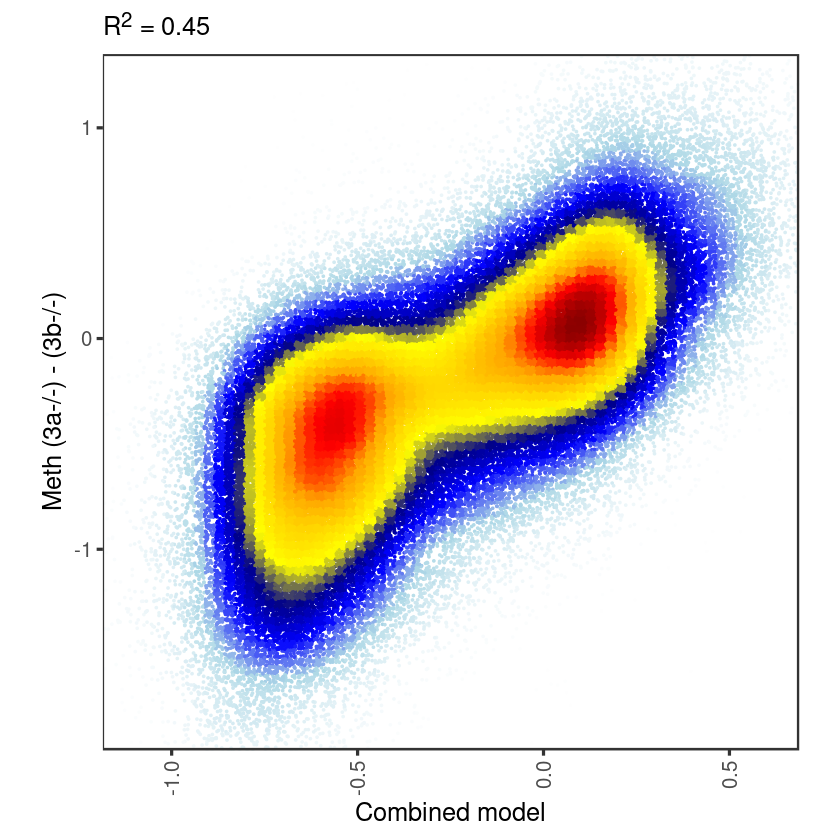

In [49]:
p_comb_score <- tibble(pred = feats_mat_comb_df$pred, y = feats_mat_comb_df$dAB) %>% 
    mutate(col = densCols(., bandwidth=0.06,colramp=colorRampPalette(c("white","lightblue", "blue", "darkblue", "yellow", "gold","orange","red", "darkred" )))) %>% 
    ggplot(aes(x=pred, y=y, col=col)) + 
        geom_point(shape=19, size=point_size) + 
        scale_color_identity() + 
        coord_cartesian(xlim = c(-1.1, 0.6), ylim = c(-1.8, 1.2)) +                 
        xlab("Combined model") + 
        ylab("Meth (3a-/-) - (3b-/-)") +         
        theme(aspect.ratio=1, panel.grid.major=element_blank(), panel.grid.minor=element_blank()) + 
        labs(subtitle = glue("R^2 = {cor}", cor = round(cor(feats_mat_comb_df$pred, feats_mat_comb_df$dAB)^2, digits=2))) + 
        theme(plot.subtitle = ggtext::element_markdown())


p_comb_score
cor(feats_mat_comb_df$dAB, feats_mat_comb_df$pred)^2

In [50]:
df <- gextract.left_join("DNMT.ab_score_xgb_plus", intervals=feats_mat_comb_df, iterator=feats_mat_comb_df) %>% select(comb_score = pred, dinuc_score = DNMT.ab_score_xgb_plus, dAB) %>% as_tibble()

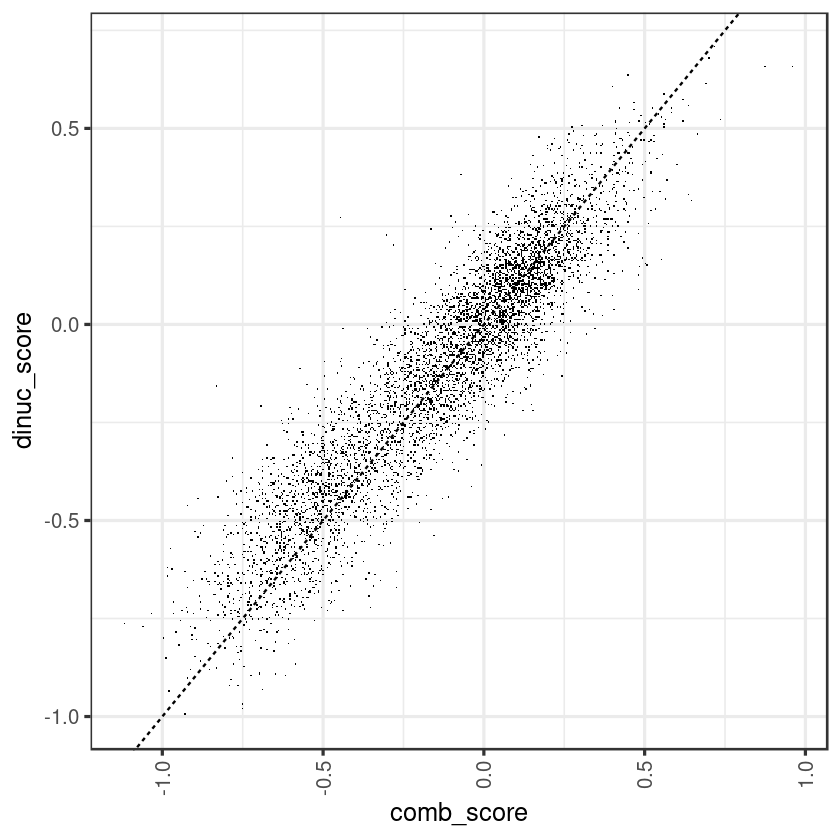

In [51]:
df %>%
        filter(abs(dAB) <= 0.05 )  %>%
        ggplot(aes(x=comb_score, y=dinuc_score)) +
            scattermore::geom_scattermore() + 
            geom_abline(linetype="dashed") + 
            theme(aspect.ratio=1)

[1] 0.8948897

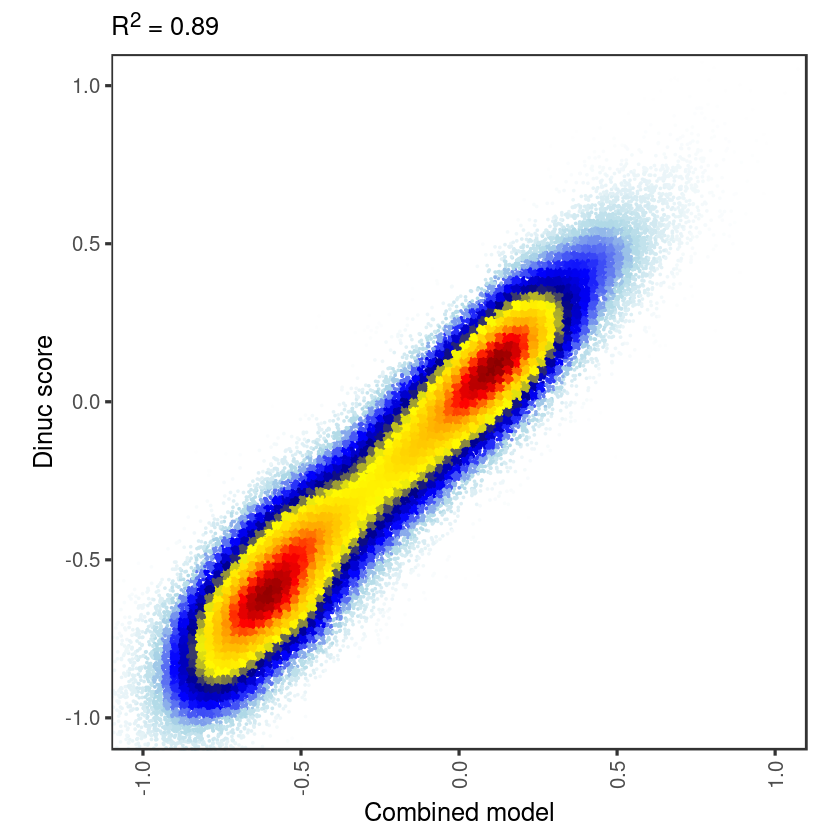

In [52]:
p_comb_vs_dinuc <- df %>% 
    mutate(col = densCols(., bandwidth=0.06,colramp=colorRampPalette(c("white","lightblue", "blue", "darkblue", "yellow", "gold","orange","red", "darkred" )))) %>% 
    ggplot(aes(x=comb_score, y=dinuc_score, col=col)) + 
        geom_point(shape=19, size=point_size) + 
        scale_color_identity() + 
        coord_cartesian(xlim = c(-1, 1), ylim = c(-1, 1)) +                 
        xlab("Combined model") + 
        ylab("Dinuc score") +         
        theme(aspect.ratio=1, panel.grid.major=element_blank(), panel.grid.minor=element_blank()) + 
        labs(subtitle = glue("R^2 = {cor}", cor = round(cor(df$comb_score, df$dinuc_score)^2, digits=2))) + 
        theme(plot.subtitle = ggtext::element_markdown())


p_comb_vs_dinuc
cor(df$comb_score, df$dinuc_score)^2

Extract sequence from model

In [53]:
flank_bp <- 5
seq_df_wide <- get_seq_df(feats_mat_comb_df %>% select(chrom, start, end), flank_bp =  flank_bp) %>% seq_df_to_wide(flank_bp = flank_bp)

In [54]:
model_glm_comb <- gen_seq_model(seq_df_wide, feats_mat_comb_df, pred) 

In [55]:
coef_df_comb <- get_coef_df(model_glm_comb)

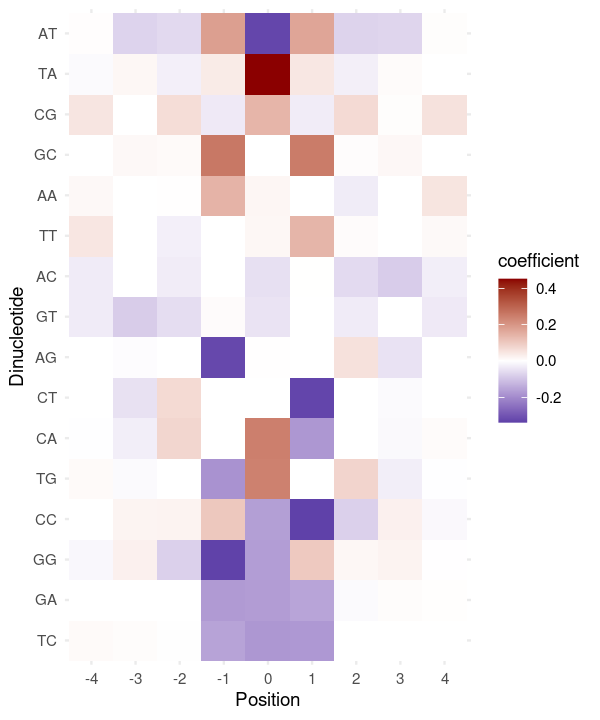

In [56]:
options(repr.plot.width = 5, repr.plot.height = 6)
p <- coef_df_comb %>% 
    ggplot(aes(x=pos, y=dinuc, fill=coefficient)) + 
        geom_tile() + 
        scale_fill_gradient2(low = "darkblue", high = "darkred", mid = "white", midpoint = 0, na.value="white") + 
        theme_minimal() + 
        ylab("Dinucleotide") + 
        xlab("Position")
p

### Figure 5I

In [57]:
model_ab <- readr::read_rds(here("output/ab_dinuc_model_5bp.rds"))

In [58]:
coef_df_ab <- get_coef_df(model_ab)

Joining, by = c("pos", "dinuc")
Warning message in cor.test.default(df$coef, df$coef_comb, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  df$coef and df$coef_comb
S = 38921, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9217878 


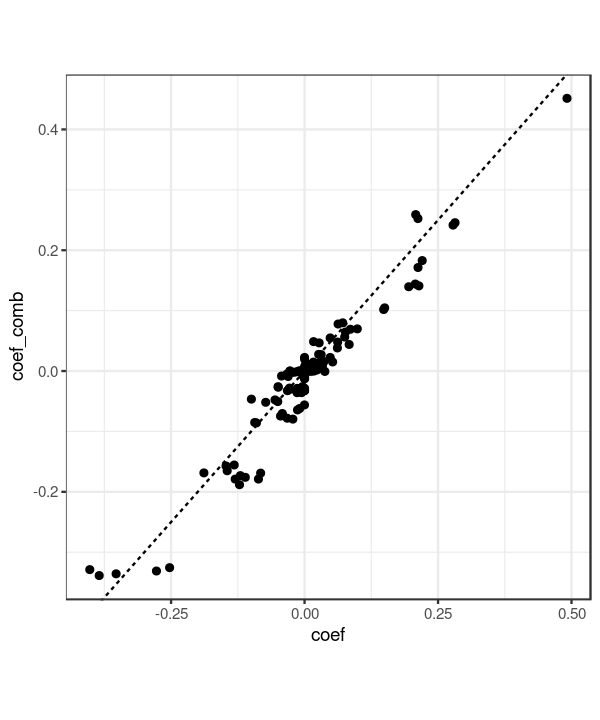

Warning message:
"ggrepel: 124 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


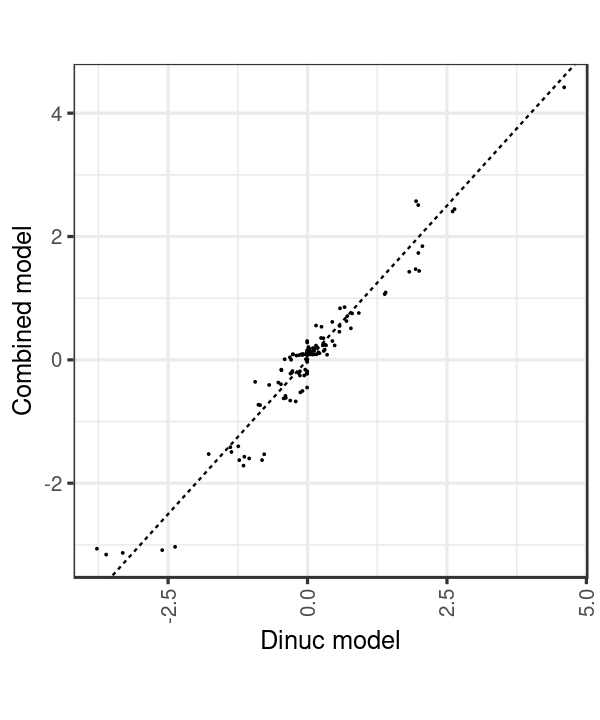

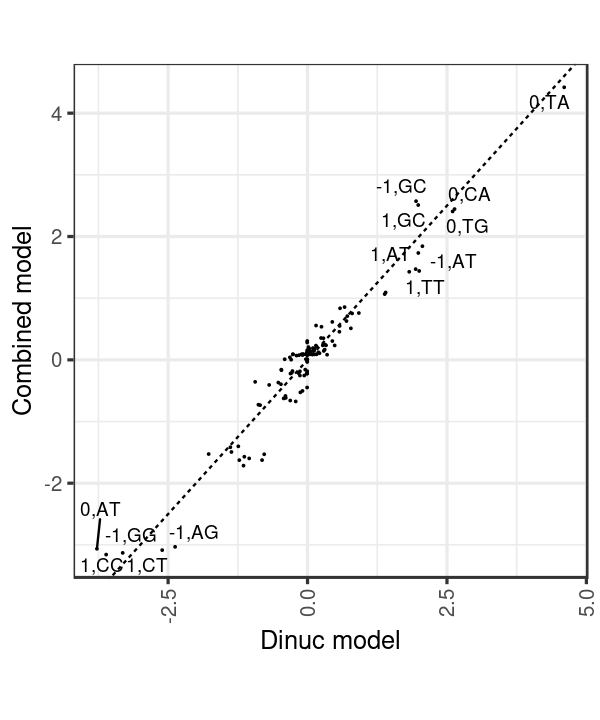

In [59]:
options(repr.plot.width = 5, repr.plot.height = 6)

df <- coef_df_comb %>% 
    select(pos, dinuc, coef_comb = coefficient) %>% 
    left_join(coef_df_ab %>% rename(coef = coefficient)) %>% 
    replace_na(replace = list(coef = 0, coef_comb = 0)) %>% 
    mutate(label = paste0(pos, ",", dinuc))

df_scale <- df %>% 
    mutate_at(vars(coef, coef_comb), function(x) x - mean(x) ) %>% 
    mutate_at(vars(coef, coef_comb), function(x) x / sd(x) ) 

p <-  df %>% 
    ggplot(aes(x=coef, y=coef_comb, label=label)) + 
        geom_point() +        
        geom_abline(linetype="dashed") + 
        theme_bw() + 
        theme(aspect.ratio=1) 
              
p_scale <- df_scale %>% 
    ggplot(aes(x=coef, y=coef_comb, label=label)) + 
        geom_point(size=0.01) +        
        geom_abline(linetype="dashed") + 
        xlab("Dinuc model") + 
        ylab("Combined model") + 
        theme(aspect.ratio=1) 

cor.test(df$coef, df$coef_comb, method="spearman")

p               
p_scale
p_scale + ggrepel::geom_text_repel() 

### Figure 5J

In [60]:
epi6 <- fread(here("output/meissner_epi_cpg_meth_sum.tsv")) %>% 
    mutate(dAB_epi6 = ko3a - ko3b, dA_epi6 = ko3a - wt, dB_epi6 = ko3b - wt) %>% 
    filter(!is.na(dAB_epi6)) %>% 
    select(chrom, start, end, wt, ko3a, ko3b, dAB_epi6, dA_epi6, dB_epi6) %>% 
    as_tibble()
nrow(epi6)

[1] 13388

In [61]:
epi6_scores <- gextract.left_join(c("DNMT.ab_score_comb", "DNMT.ab_score_xgb_plus"), intervals=epi6, iterator=epi6, colnames=c("comb_model", "eb_model")) %>%
    select(-(chrom1:end1)) %>%
    as_tibble()

[1] 0.6284416

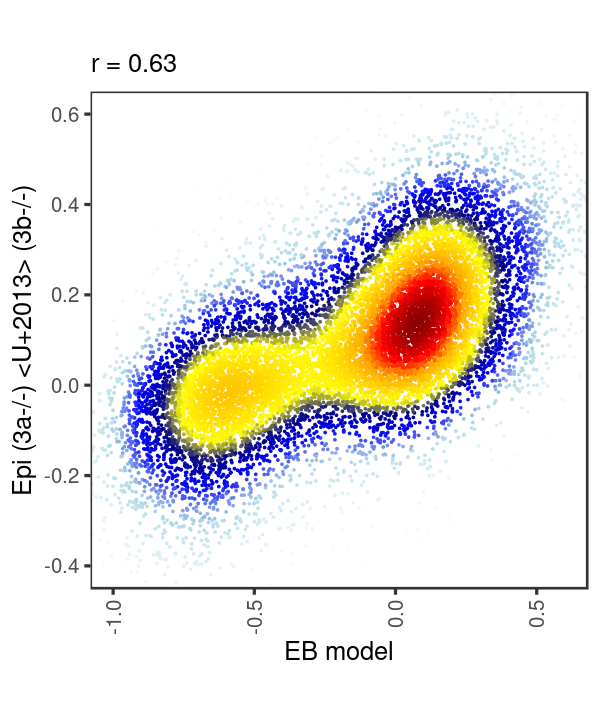

In [62]:
p_epi6_score <- epi6_scores %>% 
    select(eb_model, dAB_epi6) %>%
    mutate(col = densCols(., bandwidth=bandwidth,colramp=colorRampPalette(c("white","lightblue", "blue", "darkblue", "yellow", "gold","orange","red", "darkred" )))) %>% 
    ggplot(aes(x=eb_model, y=dAB_epi6, col=col)) + 
        geom_point(shape=19, size=point_size) + 
        scale_color_identity() + 
        coord_cartesian(xlim = c(-1, 0.6), ylim = c(-0.4, 0.6)) +         
        xlab("EB model") + 
        ylab("Epi (3a-/-) – (3b-/-)") +         
        theme(aspect.ratio=1, panel.grid.major=element_blank(), panel.grid.minor=element_blank()) + 
        labs(subtitle = glue("r = {cor}", cor = round(cor(epi6_scores$dAB_epi6, epi6_scores$eb_model), digits=2)))
cor(epi6_scores$dAB_epi6, epi6_scores$eb_model)
p_epi6_score

[1] 0.6040253

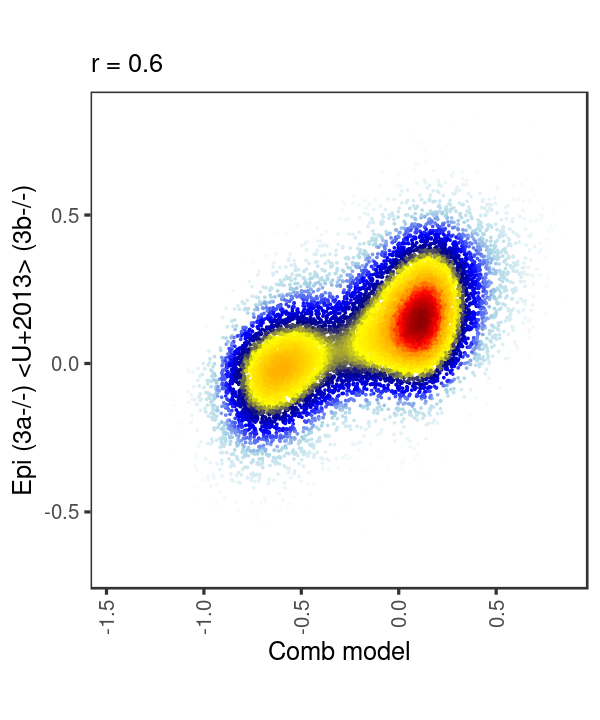

In [63]:
p_epi6_score_comb <- epi6_scores %>% 
    select(comb_model, dAB_epi6) %>%
    mutate(col = densCols(., bandwidth=bandwidth,colramp=colorRampPalette(c("white","lightblue", "blue", "darkblue", "yellow", "gold","orange","red", "darkred" )))) %>% 
    ggplot(aes(x=comb_model, y=dAB_epi6, col=col)) + 
        geom_point(shape=19, size=point_size) + 
        scale_color_identity() + 
#         coord_cartesian(xlim = c(-1, 0.6), ylim = c(-0.4, 0.6)) +         
        xlab("Comb model") + 
        ylab("Epi (3a-/-) – (3b-/-)") +         
        theme(aspect.ratio=1, panel.grid.major=element_blank(), panel.grid.minor=element_blank()) + 
        labs(subtitle = glue("r = {cor}", cor = round(cor(epi6_scores$dAB_epi6, epi6_scores$comb_model), digits=2)))
cor(epi6_scores$dAB_epi6, epi6_scores$comb_model)
p_epi6_score_comb